In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torch.optim import *
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
import numpy as np
import random

In [5]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
bs=512

# Loading MNIST Dataset 


http://yann.lecun.com/exdb/mnist/

In [12]:
# Load data set
t = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize(mean=(0), std=(1))]
                       )
 
dl_train = DataLoader( torchvision.datasets.MNIST('./data/mnist', download=True, train=True, transform=t), 
                batch_size=bs, drop_last=True, shuffle=True)
dl_valid = DataLoader( torchvision.datasets.MNIST('./data/mnist', download=True, train=False, transform=t), 
                batch_size=bs, drop_last=True, shuffle=True)

0it [00:00, ?it/s]

Extracting ./data/mnist/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

Extracting ./data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz


0it [00:00, ?it/s]

Extracting ./data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz


0it [00:00, ?it/s]

Extracting ./data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


/opt/conda/lib/python3.9/site-packages/torchvision/datasets/mnist.py:335: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1631630841592/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed).view(length, num_rows, num_cols)


Warning from MNIST downloading:

/opt/conda/lib/python3.9/site-packages/torchvision/datasets/mnist.py:335: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1631630841592/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed).view(length, num_rows, num_cols)

In [21]:
dl_train

In [14]:
dl_train.dataset

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data/mnist
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=0, std=1)
                         )
    Target Transforms (if any): None

In [15]:
dl_train.batch_size

512

In [16]:
dl_train.dataset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [23]:
# https://deeplizard.com/learn/video/mUueSPmcOBc
# see the labels for each image 

dl_train.dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [42]:
# https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Load data set
t = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize(mean=(0), std=(1))]
                       )
 
ds_train = datasets.MNIST(
    './data/mnist', 
    download=True, 
    train=True, 
    transform=t)
ds_valid = datasets.MNIST(
    './data/mnist', 
    download=True, 
    train=False, 
    transform=t)


In [43]:
ds_train.data.shape
dl_train.dataset.data.shape[0]

60000

# Visualizing MNIST Dataset


In [44]:
ds_train


Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data/mnist
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=0, std=1)
                         )
    Target Transforms (if any): None

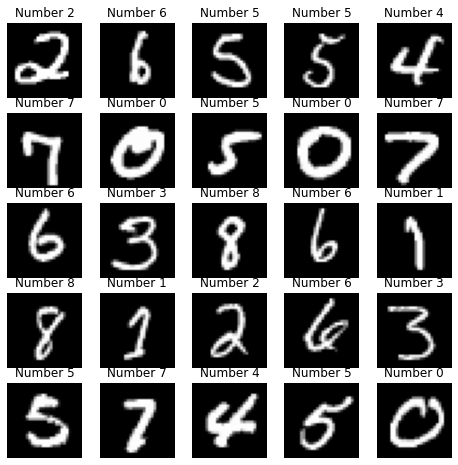

In [47]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(ds_train.data.shape[0], size=(1,)).item()

    img = ds_train.data[sample_idx]
    label = ds_train.targets[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title('Number {}'.format(label))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [138]:

class Binarize(int):
    """Binarize an image in a sample

    Args:
        threshold (int 0-255): Desired threshold, pixel below is black, pixel above or equal is white
    """

    def __init__(self, threshold):
        assert isinstance(threshold, (int))
        self.threshold = threshold

    def __call__(self, sample):
        image = sample

        print(type(image))
        np_im = np.array(image, dtype='uint8')
        img =  np_im > self.threshold #.flatten[image >= self.threshold].reshape(h, w)

        print('img type: ', type(img))
        print('img shape: ', img.shape)

        return img


In [142]:
tfm = Binarize(50)

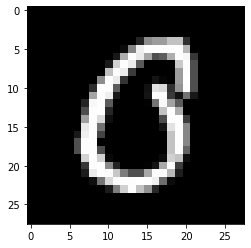

In [143]:
image = ds_train.data[234]
plt.imshow(image.squeeze(), cmap="gray")

In [144]:
new_image=tfm(image)

<class 'torch.Tensor'>
img type:  <class 'numpy.ndarray'>
img shape:  (28, 28)


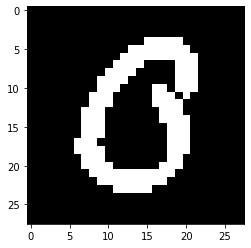

In [145]:

plt.imshow(new_image.squeeze(), cmap="gray")

In [141]:
## Load data set with my own transform for Binarize

In [139]:

t = transforms.Compose([
                       Binarize(50),
                       transforms.ToTensor()

                       
                       ]
                       )
 
ds_train = datasets.MNIST(
    './data/mnist', 
    download=True, 
    train=True, 
    transform=t)
ds_valid = datasets.MNIST(
    './data/mnist', 
    download=True, 
    train=False, 
    transform=t)

<class 'PIL.Image.Image'>
img type:  <class 'numpy.ndarray'>
img shape:  (28, 28)


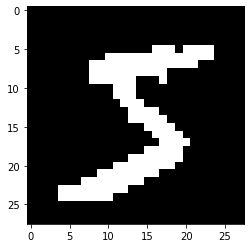

In [140]:
img, label = ds_train[0]
plt.imshow(img.squeeze(), cmap="gray")

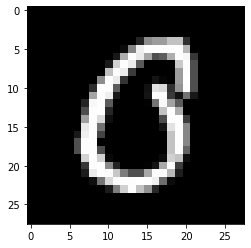

In [90]:
image = ds_train.data[234]
plt.imshow(image.squeeze(), cmap="gray")

https://stackoverflow.com/questions/52120880/transforms-not-applying-to-the-dataset


The transforms are applied when the __getitem__ method of the Dataset is called.    
For example look at the __getitem__ method of the MNIST dataset class:     
https://github.com/pytorch/vision/blob/master/torchvision/datasets/mnist.py#L62